<a href="https://colab.research.google.com/github/verykurniabakti/cv/blob/master/02EkstraksifiturFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- Prakonfigurasi ---
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt

df = pd.read_csv("data_ka_siap.csv")


In [ ]:
# --- Definisikan Fungsi Ekstraksi FFT ---
# ambil energi spektral dan frekuensi dominan (2 fitur per sinyal)
def extract_fft_features(signal, fs=50):
    N = len(signal)
    freq = np.fft.fftfreq(N, d=1/fs)
    fft_vals = np.abs(fft(signal))[:N//2]
    fft_freqs = freq[:N//2]

    dominant_freq = fft_freqs[np.argmax(fft_vals)]
    spectral_energy = np.sum(fft_vals**2)
    return dominant_freq, spectral_energy

In [4]:
# --- Sliding window
# Supaya FFT punya konteks temporal
def create_fft_feature_set(df, window_size=128, step=64):
    features = []
    labels = []
    for start in range(0, len(df) - window_size, step):
        window = df.iloc[start:start+window_size]
        label = window['label'].mode()[0]

        feats = []
        for col in ['ax','ay','az','gx','gy','gz']:
            dom_freq, energy = extract_fft_features(window[col].values)
            feats.extend([dom_freq, energy])
        features.append(feats)
        labels.append(label)

    columns = [f"{axis}_{f}" for axis in ['ax','ay','az','gx','gy','gz'] for f in ['dom_freq','energy']]
    return pd.DataFrame(features, columns=columns), labels


In [5]:
# Hasilkan Dataset Fitur FFT
X_fft, y_fft = create_fft_feature_set(df)
X_fft['label'] = y_fft
X_fft.head()


,ax_dom_freq,ax_energy,ay_dom_freq,ay_energy,az_dom_freq,az_energy,gx_dom_freq,gx_energy,gy_dom_freq,gy_energy,gz_dom_freq,gz_energy,label
0,18.359375,145.810431,23.828125,304.424245,0.00000,1372.263263,7.031250,129.087672,7.8125,346.983466,20.312500,2344.479166,1
1,14.843750,507.463416,13.671875,466.085177,22.65625,1706.906619,20.703125,26.534392,0.0000,153.300681,20.312500,596.362723,1
2,14.062500,732.700740,12.890625,660.380224,0.78125,2770.244109,0.000000,7591.035333,0.0000,2327.020362,20.703125,855.528508,1
3,23.437500,373.944440,17.187500,379.807924,0.00000,7853.786772,0.000000,64854.110050,0.0000,19471.937253,0.000000,1223.739433,0
4,0.000000,109.092337,0.000000,6.334809,0.00000,15152.062256,0.000000,133743.166772,0.0000,40771.460103,0.000000,1611.918707,0


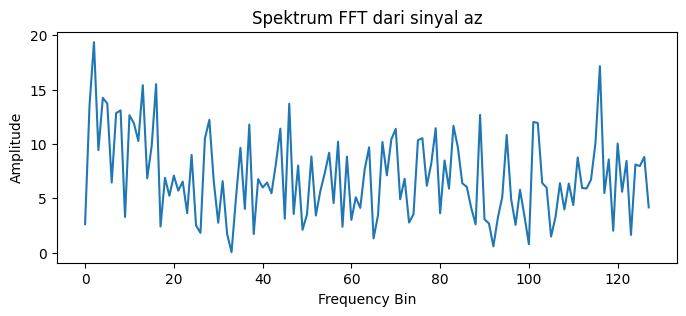

In [6]:
# --- Visualisasi FFT Sinyal ---
signal = df['az'][:256]
plt.figure(figsize=(8, 3))
plt.plot(np.abs(fft(signal))[:128])
plt.title("Spektrum FFT dari sinyal az")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.show()
